# Conjugate Gradient for logistic regression

Author: Alexandre Gramfort

In [1]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin_cg

In [2]:
fmin_cg?

In [3]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

# Make it binary
X = X[y < 2]
y = y[y < 2]

# add intercept column of ones
X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
# On a ajouté une colonne de Un, pour estimer betha et betha_zero

y[y == 0] = -1

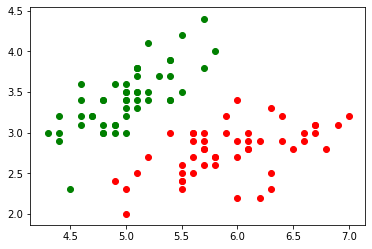

In [4]:
plt.scatter(X[y > 0, 0], X[y > 0, 1], color='r')
plt.scatter(X[y < 0, 0], X[y < 0, 1], color='g')

In [5]:
all_pobj = []

def f(w): # fonction objectif
    pobj = np.sum(np.log(1. + np.exp(- y * np.dot(X, w))))
    all_pobj.append(pobj)
    return pobj

def fprime(w): # Calcul du gradian
    ywTx = y * np.dot(X, w)
    temp = 1. / (1. + np.exp(ywTx))
    grad = -np.dot(X.T, (y * temp))
    return grad

In [6]:
n_features = X.shape[1]
w = fmin_cg(f, np.zeros(n_features), fprime)

Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 23
         Function evaluations: 81
         Gradient evaluations: 81


In [8]:
np.sign(np.dot(X, w)) - y # Cela calcul les erreurs
# Donc dans ce cas, je n'ai aucune erreure

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

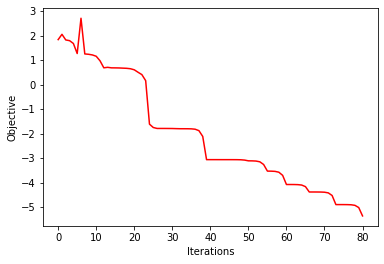

In [12]:
plt.plot(np.log10(all_pobj), 'r')
plt.xlabel('Iterations')
plt.ylabel('Objective')
plt.show()

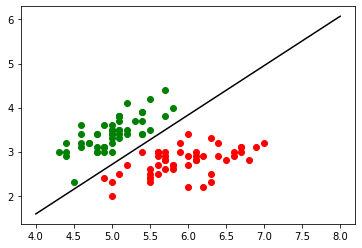

In [13]:
plt.scatter(X[y > 0, 0], X[y > 0, 1], color='r')
plt.scatter(X[y < 0, 0], X[y < 0, 1], color='g')
xx = np.linspace(4, 8, 10)
plt.plot(xx,  - xx * w[0] / w[1] - w[2] / w[1], 'k');

### Question : add support for intercept (be careful unregularised)

In [47]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(solver='lbfgs')
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
np.mean(clf.predict(X)==y)

1.0

In [38]:
from sklearn.model_selection import train_test_split
X_Train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.8)

In [46]:
clf.fit(X_Train,y_train)
clf.score(X_test,y_test)

0.975